### The description of all the columns is given below:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

#### IMPORTING THE NECCESSARY LIBRARIES FOR COMPUTING THE PROBLEM

In [3]:
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 

#### loading the housing dataset into the jupyter notebook

In [4]:
df=pd.read_csv("C:/Users/basup/OneDrive/Desktop/prediction of housing (BOSTON DATASET)/HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


###### we got the dataset into the jupyter notebook. now, let's do the Data Preproccessing

###### checking for missing values:

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

##### as we have detected missing values , we have two options
###### option-1 : to remove the rows of the missing values 
###### option-2 : to replace the missing values 

#### option-1 is not efficient as it may reduce the accuracy of the model because there are only 500+ rows available and if we drop rows of missing values. we may lose the effiency 

removing missing values with their average values from their column

In [7]:
df['CRIM']=df['CRIM'].fillna(df['CRIM'].mean())
df['ZN']=df['ZN'].fillna(df['ZN'].mean())
df['INDUS']=df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS']=df['CHAS'].fillna(df['CHAS'].mean())
df['AGE']=df['AGE'].fillna(df['AGE'].mean())
df['LSTAT']=df['LSTAT'].fillna(df['LSTAT'].mean())

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### therefore we have cleaned the missing values from the dataset

##### now, we have to detect the outliers from the dataset

#### detecting outliers using Box-Whisker plots:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

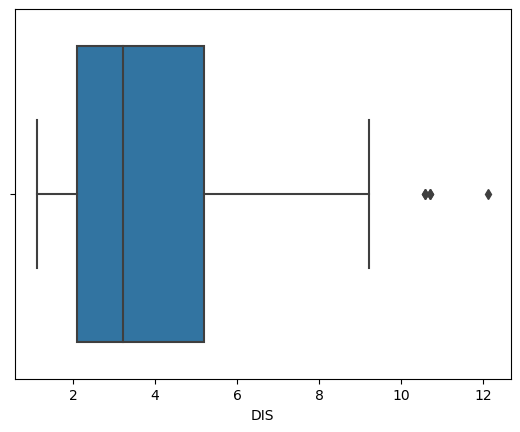

In [15]:
sns.boxplot(df['DIS'])

the values above 10 are outliers

In [16]:
np.where(df['DIS']>10)

(array([351, 352, 353, 354, 355], dtype=int64),)

##### similarly there will be outliers in every column which can be removed IQR (inter quartile range) method and replacing their values with median value

In [17]:
#calculating median and IQR
medians = df.median()
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

In [19]:
# Defining a function to identify and replace outliers based on a certain threshold
def replace_outliers(col):
    threshold = 1.5
    lower_bound = q1[col.name] - (threshold * iqr[col.name])
    upper_bound = q3[col.name] + (threshold * iqr[col.name])
    col[col < lower_bound] = medians[col.name]
    col[col > upper_bound] = medians[col.name]
    return col

# Apply the function to each column in the DataFrame
df = df.apply(replace_outliers)

####  therefore the outliers have been removed from the dataset. we can cross verify by checking the outliers of the DIS column

In [21]:
np.where(df['DIS']>10)

(array([], dtype=int64),)

###### we can find that there are no outliers detected in the DIS.

## DATA VISUALIZATION

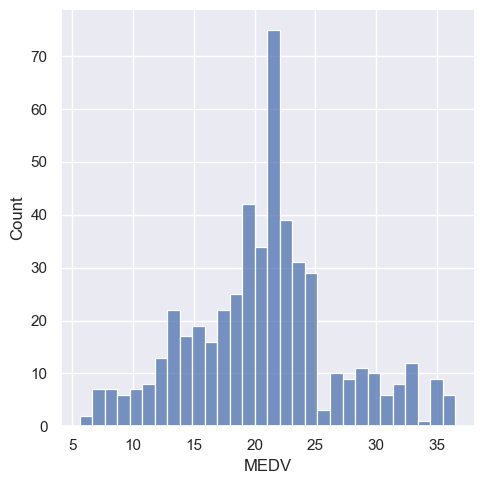

In [23]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.displot(df['MEDV'], bins=30)
plt.show()

### Correlation matrix

<AxesSubplot:>

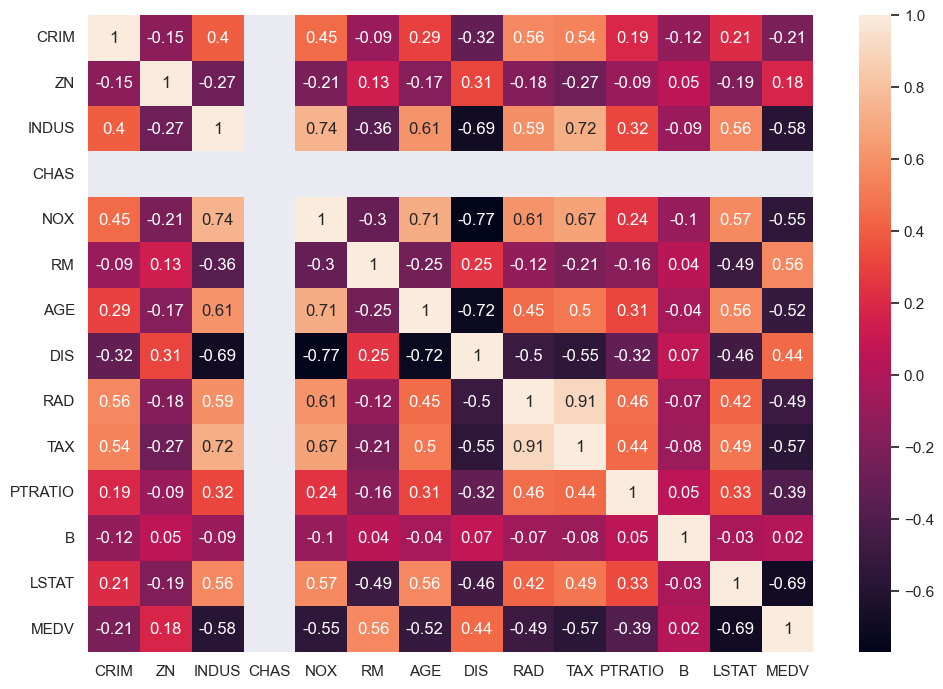

In [24]:
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Observations

From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

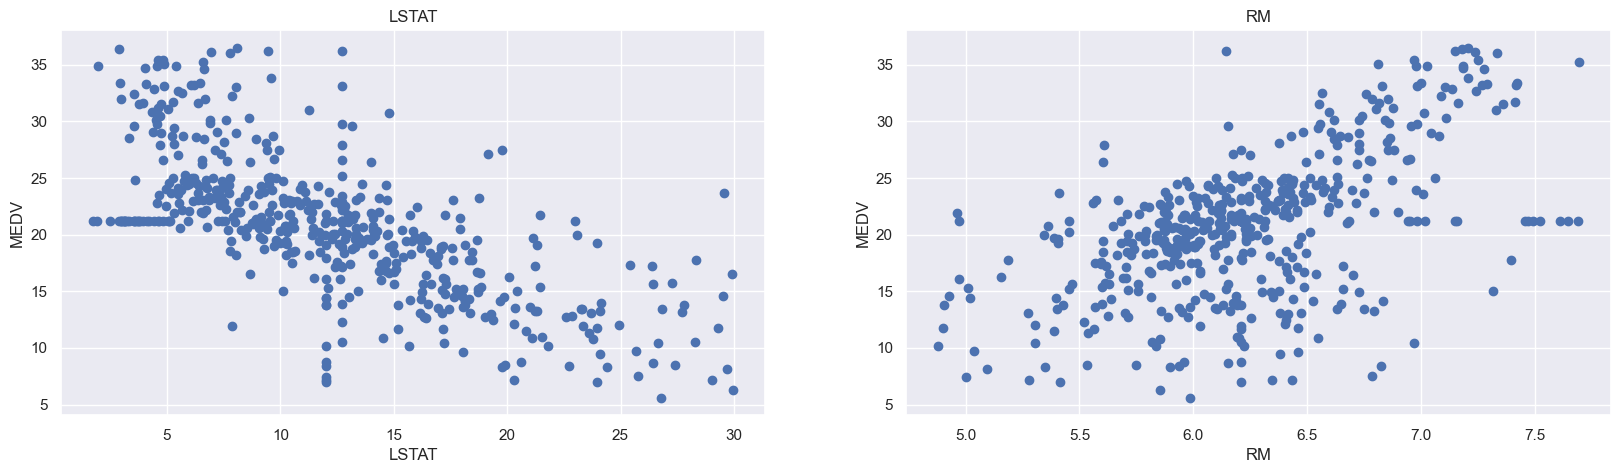

In [26]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### model training

In [28]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
from sklearn.model_selection import train_test_split
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


#### Training the model using sklearn LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

#### Model evaluation:

In [30]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
RMSE is 4.305425606668655
R2 score is 0.5169970899162113


The model performance for testing set
RMSE is 3.805816020369416
R2 score is 0.6156861324850629


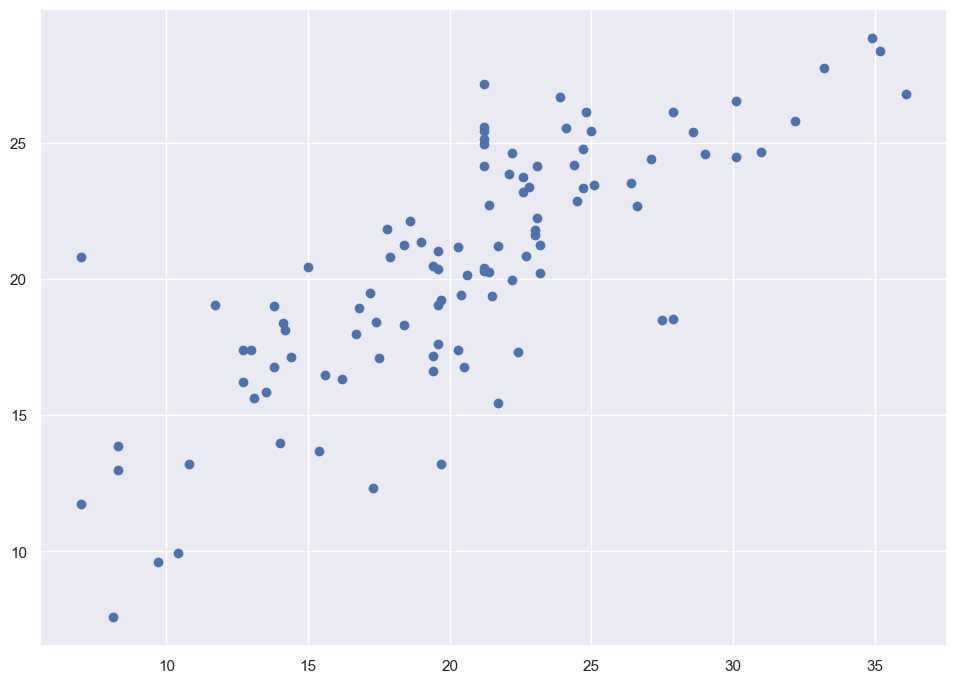

In [31]:
plt.scatter(Y_test, y_test_predict)
plt.show()
     

### In this way we have loaded the dataset of the Boston Housing and used the Linear regression algorithm to predict the prices of the houses based on the Percentage of lower status of the population and Average number of rooms per dwelling as these were the most featured variables which will effect the pricing which we found out from the correlation graph (heatmap)